In [115]:

import pandas as pd
df = pd.read_csv('C:\\Users\\inflation.csv')

df = df.fillna('-')
df.head()


,Indent Level,Item and Group,Weight,Parent
0,0,All items,100.000,-
1,1,Food and beverages,15.157,All items
2,2,Food,14.119,Food and beverages
3,3,Food at home,7.772,Food
4,4,Cereals and bakery products,1.001,Food at home


In [116]:

import plotly.express as px 
import plotly.graph_objects as go


fig2 = px.sunburst(df, path=['Parent', 'Item and Group'], values='Weight', color='Parent', maxdepth=2)
fig2.update_layout(title_text="Sunburst Diagram", font_size=10)
fig2.show()


fig2 = px.sunburst(df, path=['Parent', 'Item and Group'], values='Weight', color='Parent', maxdepth=1)
fig2.update_layout(title_text="Sunburst Diagram", font_size=10)
fig2.show()


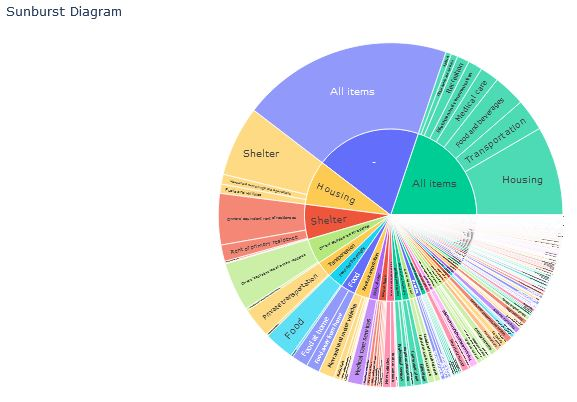

In [127]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Capture1.JPG")


In [117]:

fig3 = px.treemap(df, path=['Parent', 'Item and Group'], values='Weight', color='Parent')
fig3.show()

fig3 = px.treemap(df, path=['Parent', 'Item and Group'], values='Weight', color='Parent', maxdepth=1)
fig3.show()


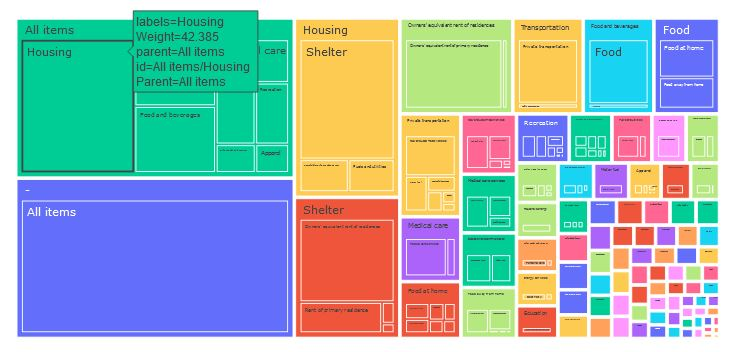

In [128]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Capture2.JPG")


In [126]:

# Get the data in the format Plotly wants
label_dict = { df['Item and Group'][i] : i for i in range(0, len(df) ) }


# Initialize empty arrays
source = []
target = []
value = []

for i, row in df.iterrows():
    # Skip the root level
    if row["Item and Group"] != 'All items': 
        source.append(label_dict[row["Parent"]])
        target.append(label_dict[row["Item and Group"]])
        value.append(row["Weight"])   
        
# Plot the figure
sankey_full = go.Figure(data=[go.Sankey(
    valueformat = ".1f",
    valuesuffix = "%",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = df["Item and Group"].to_list(),
      color = "blue",
      hovertemplate='%{label} is %{value} of spending',
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value
  ))])

sankey_full.show()


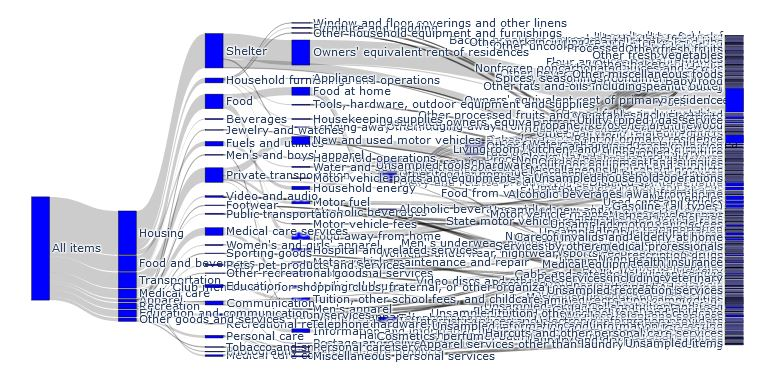

In [129]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Capture3.JPG")


In [123]:

import networkx as nx 

# Convert the data into networkx format
G = nx.from_pandas_edgelist(df[df["Item and Group"] != 'All items'], 
                            source = 'Item and Group', target = 'Parent', edge_attr = 'Weight')

# Set the positions of the nodes in the graph - other options are spring, planar or spectral
pos = nx.kamada_kawai_layout(G, weight = None)
for n, p in pos.items():
    G.nodes[n]['pos'] = p
    
# Add weight and depth attributes to the nodes
for x in df["Item and Group"]: 
    G.nodes[x]['Weight'] = df[df["Item and Group"] == x]["Weight"].values[0]
    G.nodes[x]['Depth'] = df[df["Item and Group"] == x]["Indent Level"].values[0]
    
# Add position info to edges
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Draw the edges
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

# Draw the nodes
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Indent Level',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_depth = []
node_text = []

for n in G.nodes.items():
    node_depth.append(n[1]["Depth"])
    node_text.append(n[0] + " {0:.2f}%".format(n[1]["Weight"]))
                         
node_trace.marker.color = node_depth
node_trace.text = node_text

# Draw the full graph
graph = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='8-Level network graph',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
graph.show()


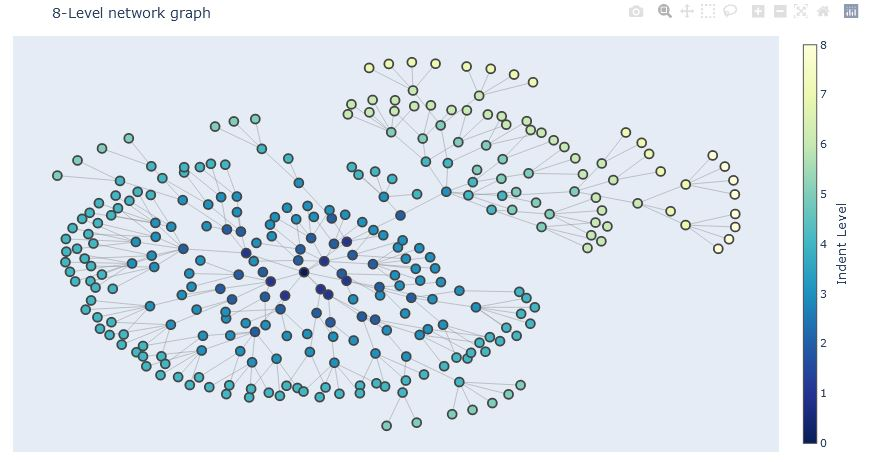

In [130]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Capture4.JPG")


In [125]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(df, source='Item and Group', target='Parent', edge_attr='Weight')

from pyvis.network import Network
net = Network(notebook=True)
net.from_nx(G)
net.show('example.html')


example.html


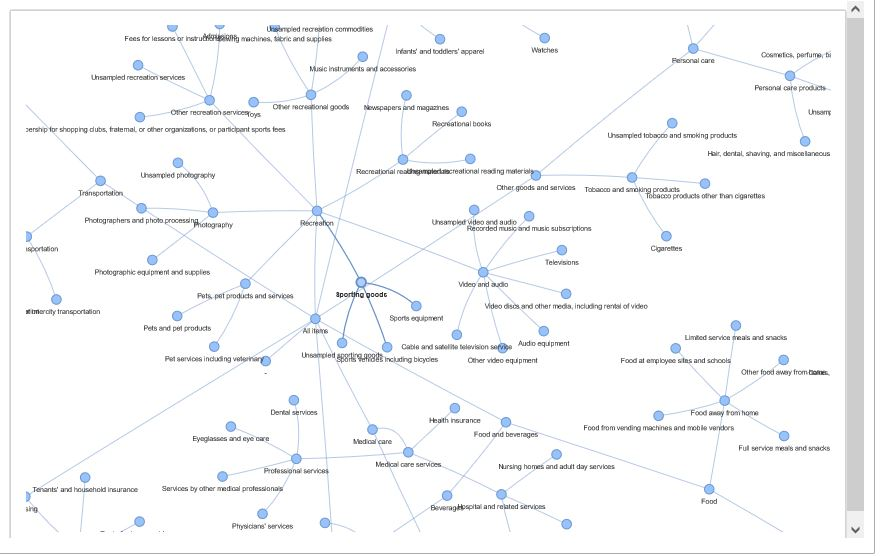

In [131]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Capture5.JPG")


In [ ]:

# https://towardsdatascience.com/visualize-hierarchical-data-using-plotly-and-datapane-7e5abe2686e1
